In [1]:
from lib.jianji.code_csf import csf
import torch 
from torch.utils.data import Dataset
from torch import nn
from d2l import torch as d2l

In [3]:
traindSet = csf(csv_path='original_train_set.pkl', mode='train')
trainloader =  torch.utils.data.DataLoader(traindSet, batch_size=1024, drop_last=True, shuffle=True)

In [3]:
traindSet[1024]

(array([0.75, 0.25, 1.  , 0.75, 0.5 , 0.25, 0.25, 0.75, 0.5 , 0.5 , 1.  ,
        0.25, 1.  , 1.  , 0.5 , 0.5 , 0.5 , 0.25, 0.25, 0.75, 1.  , 0.5 ,
        1.  , 1.  , 0.25, 1.  , 1.  , 0.5 , 0.25, 0.25, 1.  , 0.75, 0.75,
        1.  , 0.5 , 0.75, 0.5 , 0.5 , 0.25, 0.5 , 1.  , 1.  , 0.25, 0.75,
        1.  , 1.  , 0.5 , 0.5 , 0.25, 0.5 , 0.5 , 0.25, 1.  , 1.  , 0.25,
        1.  , 1.  , 0.5 , 1.  , 1.  , 0.25, 0.5 , 0.5 , 0.75, 0.5 , 0.75,
        0.75, 0.5 , 1.  , 1.  , 0.25, 0.75, 0.75, 0.25, 1.  , 0.75, 0.25,
        0.5 , 0.5 , 0.5 , 1.  , 0.75, 0.5 , 0.75, 0.5 , 0.5 , 0.25, 0.75,
        0.5 , 0.5 , 0.75, 0.5 , 0.25, 0.25, 0.25, 0.5 , 0.5 , 1.  , 0.5 ,
        0.25, 0.75, 0.75, 1.  , 0.25, 1.  , 0.5 , 0.5 , 0.75, 1.  , 0.75,
        1.  , 0.25, 0.75, 1.  , 0.5 , 0.5 , 0.75, 0.25, 0.75, 0.75, 1.  ,
        0.75, 0.5 , 0.5 , 0.5 , 0.75, 0.25, 0.5 , 0.5 , 0.25, 0.75, 0.25,
        0.25, 0.25, 1.  , 0.75, 0.25, 1.  , 1.  , 0.5 , 0.25, 0.25, 0.5 ,
        1.  , 0.5 , 0.25, 0.5 , 0.75, 

In [4]:
for i, (X, y) in enumerate(trainloader):
    print(X.shape)
    print(y.shape)
    print(i)
    break

torch.Size([1024, 152])
torch.Size([1024, 1])
0


In [3]:
testset = csf(csv_path='original_valid_set.pkl', mode='valid')
testloader = torch.utils.data.DataLoader(testset, batch_size=1024, drop_last=True, shuffle=True)

In [4]:
net = nn.Sequential(
    nn.Linear(152, 608), nn.ReLU(),
    nn.Linear(608, 1024), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(1024, 512), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(512, 128), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(128, 16), nn.ReLU(),
    nn.Linear(16, 4), nn.ReLU(),
    nn.Linear(4, 1), nn.Sigmoid())

In [5]:
print(net)

Sequential(
  (0): Linear(in_features=152, out_features=608, bias=True)
  (1): ReLU()
  (2): Linear(in_features=608, out_features=1024, bias=True)
  (3): ReLU()
  (4): Dropout(p=0.5, inplace=False)
  (5): Linear(in_features=1024, out_features=512, bias=True)
  (6): ReLU()
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=128, bias=True)
  (9): ReLU()
  (10): Dropout(p=0.5, inplace=False)
  (11): Linear(in_features=128, out_features=16, bias=True)
  (12): ReLU()
  (13): Linear(in_features=16, out_features=4, bias=True)
  (14): ReLU()
  (15): Linear(in_features=4, out_features=1, bias=True)
  (16): Sigmoid()
)


In [8]:
X = torch.rand(size=(1, 152), dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

Linear output shape: 	 torch.Size([1, 608])
ReLU output shape: 	 torch.Size([1, 608])
Dropout output shape: 	 torch.Size([1, 608])
Linear output shape: 	 torch.Size([1, 1024])
ReLU output shape: 	 torch.Size([1, 1024])
Dropout output shape: 	 torch.Size([1, 1024])
Linear output shape: 	 torch.Size([1, 512])
ReLU output shape: 	 torch.Size([1, 512])
Dropout output shape: 	 torch.Size([1, 512])
Linear output shape: 	 torch.Size([1, 128])
ReLU output shape: 	 torch.Size([1, 128])
Dropout output shape: 	 torch.Size([1, 128])
Linear output shape: 	 torch.Size([1, 16])
ReLU output shape: 	 torch.Size([1, 16])
Dropout output shape: 	 torch.Size([1, 16])
Linear output shape: 	 torch.Size([1, 4])
ReLU output shape: 	 torch.Size([1, 4])
Dropout output shape: 	 torch.Size([1, 4])
Linear output shape: 	 torch.Size([1, 1])
Sigmoid output shape: 	 torch.Size([1, 1])


In [6]:
def evaluate_accuracy_gpu(net, data_iter, device=None): #@save
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    # 正确预测的数量，总预测的数量
    metric = d2l.Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # BERT微调所需的（之后将介绍）
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            output = net(X)
            y_pred = torch.where(output>0.5,torch.ones_like(output),torch.zeros_like(output))
            metric.add(d2l.accuracy(y_pred, y), y.numel())
    return metric[0] / metric[1]

In [7]:
def train(net, train_iter, test_iter, num_epochs, lr, device):
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.BCELoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    num_batches = len(train_iter)
    for epoch in range(num_epochs):
        # 训练损失之和，训练准确率之和，样本数
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                train_acc_num = torch.where(y_hat>0.5,torch.ones_like(y_hat),torch.zeros_like(y_hat))
                metric.add(l * X.shape[0], d2l.accuracy(train_acc_num, y), X.shape[0])
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')

In [ ]:
lr, num_epochs = 0.1, 10
train(net, trainloader, testloader, num_epochs, lr, d2l.try_gpu())

loss 0.677, train acc 0.583, test acc 0.620


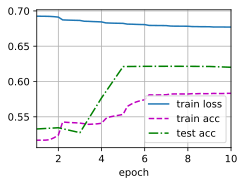

In [8]:
lr, num_epochs = 0.1, 10
train(net, trainloader, testloader, num_epochs, lr, d2l.try_gpu())

In [23]:
def continue_train(net, num_epochs, train_iter, test_iter, device):
    for epoch in range(num_epochs):
        # 训练损失之和，训练准确率之和，样本数
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                train_acc_num = torch.where(y_hat>0.5,torch.ones_like(y_hat),torch.zeros_like(y_hat))
                metric.add(l * X.shape[0], d2l.accuracy(train_acc_num, y), X.shape[0])
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
        print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')

loss 0.671, train acc 0.594, test acc 0.599


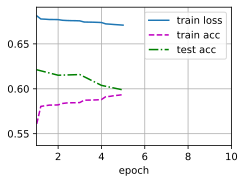

In [27]:
lr = 0.3
optimizer = torch.optim.SGD(net.parameters(), lr=lr)
num_batches = len(trainloader)
animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
loss = nn.BCELoss()
continue_train(net, 5, trainloader, testloader, d2l.try_gpu())

loss 0.428, train acc 0.798, test acc 0.515


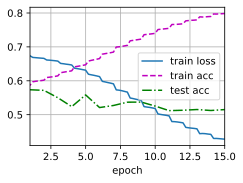

In [28]:
lr = 0.6
optimizer = torch.optim.SGD(net.parameters(), lr=lr)
num_batches = len(trainloader)
animator = d2l.Animator(xlabel='epoch', xlim=[1, 15],
                            legend=['train loss', 'train acc', 'test acc'])
loss = nn.BCELoss()
continue_train(net, 15, trainloader, testloader, d2l.try_gpu())

In [29]:
torch.save(net, 'over_fitted_model.pth')

In [10]:
traindSet[0]

(array([0.25, 0.5 , 0.25, 0.75, 0.25, 1.  , 1.  , 0.75, 0.75, 1.  , 0.5 ,
        0.75, 1.  , 0.25, 0.75, 0.75, 0.75, 0.25, 0.5 , 1.  , 0.75, 0.5 ,
        0.25, 0.75, 0.75, 0.25, 0.75, 0.75, 1.  , 0.25, 0.75, 1.  , 0.5 ,
        0.5 , 0.25, 0.25, 0.75, 0.25, 1.  , 0.75, 0.5 , 0.5 , 0.25, 1.  ,
        0.25, 1.  , 0.25, 0.75, 0.25, 1.  , 0.25, 0.25, 0.75, 0.25, 0.5 ,
        0.5 , 1.  , 1.  , 0.25, 0.75, 0.75, 1.  , 0.25, 0.5 , 1.  , 0.75,
        1.  , 0.25, 0.75, 0.75, 0.75, 0.5 , 1.  , 1.  , 0.75, 0.75, 0.25,
        0.5 , 0.5 , 0.75, 0.75, 0.75, 1.  , 1.  , 0.5 , 0.75, 0.75, 0.25,
        0.75, 0.5 , 1.  , 1.  , 0.5 , 0.75, 0.5 , 0.25, 1.  , 0.25, 0.75,
        1.  , 1.  , 0.75, 1.  , 0.25, 0.25, 0.25, 0.5 , 1.  , 1.  , 0.75,
        0.5 , 0.5 , 0.25, 0.75, 0.5 , 0.5 , 0.25, 0.5 , 1.  , 0.25, 1.  ,
        0.5 , 0.5 , 0.5 , 0.75, 0.5 , 1.  , 0.25, 0.25, 0.5 , 1.  , 0.5 ,
        0.75, 0.25, 0.5 , 0.25, 1.  , 0.5 , 0.75, 1.  , 0.5 , 0.25, 1.  ,
        1.  , 1.  , 0.75, 0.25, 0.5 , 

In [ ]:
lr, num_epochs = 0.5, 5
train(net, trainloader, testloader, num_epochs, lr, d2l.try_gpu())

In [19]:
y = torch.tensor(traindSet[1001][0])

In [20]:
net(y.cuda())

tensor([0.4081], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [1]:
from lib.jianji.code_csf import csf
import torch 
from torch.utils.data import Dataset
from torch import nn
from d2l import torch as d2l

In [2]:
new_model = torch.load('over_fitted_model.pth')

In [4]:
def evaluate_accuracy_gpu(net, data_iter, device=None): #@save
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    # 正确预测的数量，总预测的数量
    metric = d2l.Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            X = X.to(device)
            y = y.to(device)
            output = net(X)
            y_pred = torch.where(output>0.5,torch.ones_like(output),torch.zeros_like(output))
            metric.add(d2l.accuracy(y_pred, y), y.numel())
    return metric[0] / metric[1]

In [ ]:
evaluate_accuracy_gpu(new_model, trainloader,  d2l.try_gpu())

In [5]:
d2l.accuracy??

Signature: d2l.accuracy(y_hat, y)
Source:   
def accuracy(y_hat, y):
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = d2l.argmax(y_hat, axis=1)
    cmp = d2l.astype(y_hat, y.dtype) == y
    return float(d2l.reduce_sum(d2l.astype(cmp, y.dtype)))
File:      c:\users\jiang su\.conda\envs\pytorch\lib\site-packages\d2l\torch.py
Type:      function

In [6]:
d2l.argmax??

Signature: d2l.argmax(x, *args, **kwargs)
Docstring: <no docstring>
Source:    argmax = lambda x, *args, **kwargs: x.argmax(*args, **kwargs)
File:      c:\users\jiang su\.conda\envs\pytorch\lib\site-packages\d2l\torch.py
Type:      function

In [13]:
y_test = torch.rand(5, 6)

In [14]:
y_test

tensor([[0.3513, 0.1394, 0.7345, 0.1532, 0.7567, 0.2771],
        [0.8805, 0.0710, 0.2641, 0.5125, 0.3475, 0.0747],
        [0.9414, 0.2914, 0.2717, 0.2305, 0.6266, 0.1301],
        [0.2191, 0.6298, 0.0292, 0.8076, 0.6515, 0.3282],
        [0.5539, 0.4210, 0.6169, 0.1882, 0.3020, 0.1239]])

In [15]:
m = nn.Softmax(dim=1)
y_test = m(y_test)

In [16]:
y_test

tensor([[0.1533, 0.1240, 0.2248, 0.1257, 0.2299, 0.1423],
        [0.2695, 0.1199, 0.1455, 0.1865, 0.1582, 0.1204],
        [0.2703, 0.1411, 0.1384, 0.1328, 0.1973, 0.1201],
        [0.1283, 0.1935, 0.1061, 0.2312, 0.1977, 0.1431],
        [0.1976, 0.1730, 0.2104, 0.1370, 0.1536, 0.1285]])

In [17]:
y_1 = d2l.argmax(y_test, axis=1)

In [18]:
y_1

tensor([4, 0, 0, 3, 2])

In [19]:
x = torch.arange(2, 5)

In [31]:
x = torch.tensor([2, 3, 4, 1, 3])

In [33]:
f = torch.nn.functional.one_hot(x, num_classes=6)

In [34]:
f

tensor([[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0]])

In [23]:
d2l.astype??

Signature: d2l.astype(x, *args, **kwargs)
Docstring: <no docstring>
Source:    astype = lambda x, *args, **kwargs: x.type(*args, **kwargs)
File:      c:\users\jiang su\.conda\envs\pytorch\lib\site-packages\d2l\torch.py
Type:      function

In [29]:
f.type(y_test.dtype)

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [28]:
y_test.dtype

torch.float32

In [30]:
c = f == y_test

RuntimeError: The size of tensor a (10) must match the size of tensor b (6) at non-singleton dimension 1

In [38]:
y_test.shape

torch.Size([5, 6])

In [39]:
f.shape

torch.Size([5, 6])

In [41]:
y_test

tensor([[0.1533, 0.1240, 0.2248, 0.1257, 0.2299, 0.1423],
        [0.2695, 0.1199, 0.1455, 0.1865, 0.1582, 0.1204],
        [0.2703, 0.1411, 0.1384, 0.1328, 0.1973, 0.1201],
        [0.1283, 0.1935, 0.1061, 0.2312, 0.1977, 0.1431],
        [0.1976, 0.1730, 0.2104, 0.1370, 0.1536, 0.1285]])

In [42]:
f

tensor([[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0]])

In [45]:
a = torch.tensor([2, 3, 4, 1, 3], dtype = torch.float32)

In [46]:
d2l.accuracy(y_test, a)

0.0

In [47]:
from lib.jianji.code_csf import csf
import torch 
from torch.utils.data import Dataset
from torch import nn
from d2l import torch as d2l

In [49]:
traindSet = csf(csv_path='original_train_set.pkl', mode='train')
trainloader =  torch.utils.data.DataLoader(traindSet, batch_size=32, drop_last=True, shuffle=True)

In [51]:
for X, y in trainloader:
    print(X)
    print(y)
    break

tensor([[0.7500, 0.5000, 0.5000,  ..., 0.2500, 1.0000, 0.7500],
        [0.7500, 1.0000, 0.2500,  ..., 1.0000, 0.7500, 1.0000],
        [0.2500, 0.2500, 0.2500,  ..., 0.7500, 0.5000, 0.2500],
        ...,
        [0.7500, 1.0000, 0.7500,  ..., 0.2500, 0.7500, 0.7500],
        [0.2500, 1.0000, 1.0000,  ..., 0.2500, 0.7500, 0.2500],
        [0.7500, 1.0000, 0.5000,  ..., 1.0000, 0.2500, 1.0000]])
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.]])


In [57]:
train_data, label = traindSet[index]

TypeError: only integer tensors of a single element can be converted to an index

In [63]:
traindSet[1]

(array([0.25, 0.25, 0.5 , 0.75, 0.75, 1.  , 0.75, 0.25, 0.75, 1.  , 0.75,
        0.25, 0.25, 1.  , 1.  , 1.  , 0.5 , 1.  , 0.75, 0.75, 1.  , 0.25,
        0.75, 0.5 , 0.75, 0.25, 1.  , 0.25, 0.25, 1.  , 0.5 , 0.5 , 1.  ,
        0.75, 0.5 , 1.  , 0.25, 1.  , 0.5 , 0.75, 0.25, 0.75, 0.75, 0.75,
        0.5 , 0.25, 0.25, 0.75, 0.5 , 0.25, 1.  , 0.75, 1.  , 1.  , 0.5 ,
        0.75, 1.  , 1.  , 1.  , 0.25, 0.25, 0.25, 0.5 , 1.  , 0.5 , 0.75,
        1.  , 0.25, 0.5 , 0.5 , 0.5 , 0.75, 0.5 , 1.  , 0.25, 1.  , 1.  ,
        0.75, 0.75, 1.  , 0.75, 0.25, 0.5 , 0.5 , 0.25, 0.75, 0.25, 0.5 ,
        0.5 , 0.75, 0.5 , 0.75, 0.75, 1.  , 0.5 , 1.  , 0.5 , 0.25, 0.75,
        0.5 , 0.75, 0.75, 0.25, 0.5 , 0.25, 0.5 , 0.75, 0.25, 0.75, 0.25,
        0.75, 0.25, 0.5 , 0.25, 0.25, 0.5 , 0.75, 0.75, 0.5 , 0.75, 0.25,
        0.5 , 0.75, 0.25, 0.5 , 0.25, 1.  , 1.  , 0.5 , 0.25, 1.  , 0.5 ,
        0.75, 1.  , 0.5 , 1.  , 0.5 , 1.  , 0.25, 0.5 , 0.75, 0.75, 0.25,
        0.5 , 1.  , 0.5 , 0.25, 1.  , 

In [65]:
import numpy as np
index_list = np.arange(32)

In [66]:
index_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [74]:
first_dataloader_data = []
first_dataloader_label = []
for i in index_list:
    X, y = traindSet[i]
    first_dataloader_data.append(X)
    first_dataloader_label.append(y)

In [87]:
a = torch.tensor(first_dataloader_data)

In [88]:
a

tensor([[0.2500, 0.5000, 0.2500,  ..., 0.2500, 0.2500, 0.5000],
        [0.2500, 0.2500, 0.5000,  ..., 0.7500, 1.0000, 1.0000],
        [0.2500, 0.2500, 0.5000,  ..., 1.0000, 0.2500, 1.0000],
        ...,
        [0.7500, 0.7500, 0.2500,  ..., 0.2500, 0.7500, 0.7500],
        [0.2500, 1.0000, 0.7500,  ..., 0.2500, 0.2500, 0.2500],
        [0.5000, 1.0000, 1.0000,  ..., 0.5000, 0.7500, 1.0000]])

In [89]:
b = torch.tensor(first_dataloader_label)

In [90]:
b

tensor([[1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.]])

In [91]:
model = torch.load('over_fitted_model.pth')

In [92]:
model.eval()

Sequential(
  (0): Linear(in_features=152, out_features=608, bias=True)
  (1): ReLU()
  (2): Linear(in_features=608, out_features=1024, bias=True)
  (3): ReLU()
  (4): Dropout(p=0.5, inplace=False)
  (5): Linear(in_features=1024, out_features=512, bias=True)
  (6): ReLU()
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=128, bias=True)
  (9): ReLU()
  (10): Dropout(p=0.5, inplace=False)
  (11): Linear(in_features=128, out_features=16, bias=True)
  (12): ReLU()
  (13): Linear(in_features=16, out_features=4, bias=True)
  (14): ReLU()
  (15): Linear(in_features=4, out_features=1, bias=True)
  (16): Sigmoid()
)

In [95]:
model.to('cpu')

Sequential(
  (0): Linear(in_features=152, out_features=608, bias=True)
  (1): ReLU()
  (2): Linear(in_features=608, out_features=1024, bias=True)
  (3): ReLU()
  (4): Dropout(p=0.5, inplace=False)
  (5): Linear(in_features=1024, out_features=512, bias=True)
  (6): ReLU()
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=128, bias=True)
  (9): ReLU()
  (10): Dropout(p=0.5, inplace=False)
  (11): Linear(in_features=128, out_features=16, bias=True)
  (12): ReLU()
  (13): Linear(in_features=16, out_features=4, bias=True)
  (14): ReLU()
  (15): Linear(in_features=4, out_features=1, bias=True)
  (16): Sigmoid()
)

In [96]:
output = model(a)

In [97]:
output

tensor([[0.6873],
        [0.2639],
        [0.4204],
        [0.2207],
        [0.9887],
        [0.1595],
        [0.0580],
        [0.3415],
        [0.1399],
        [0.0539],
        [0.9939],
        [0.2839],
        [0.2887],
        [0.1750],
        [0.9736],
        [0.9994],
        [0.9911],
        [0.1045],
        [0.7165],
        [0.0343],
        [0.3490],
        [0.2061],
        [0.6374],
        [0.1663],
        [0.3842],
        [0.2284],
        [0.9606],
        [0.9908],
        [0.2050],
        [0.9981],
        [0.6395],
        [0.1162]], grad_fn=<SigmoidBackward0>)

In [98]:
output>=0.5

tensor([[ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [False]])

In [101]:
c = torch.where(output>=0.5, torch.ones_like(output), torch.zeros_like(output))

In [102]:
c

tensor([[1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.]])

In [105]:
d = c.type(b.dtype) == b

In [107]:
d

tensor([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]])

In [108]:
sum(d).item()

30

In [109]:
validSet = csf(csv_path='original_valid_set.pkl', mode='valid')

In [110]:
test_list = np.arange(32)

In [111]:
valid_data = []
valid_label = []
for i in test_list:
    X, y = validSet[i]
    valid_data.append(X)
    valid_label.append(y)

In [112]:
e = torch.tensor(valid_data)
f = torch.tensor(valid_label)

In [113]:
e

tensor([[1.0000, 0.2500, 0.7500,  ..., 1.0000, 0.2500, 0.2500],
        [0.5000, 0.2500, 1.0000,  ..., 1.0000, 0.2500, 1.0000],
        [0.5000, 1.0000, 1.0000,  ..., 0.5000, 0.7500, 0.5000],
        ...,
        [0.2500, 0.7500, 0.5000,  ..., 1.0000, 0.7500, 0.5000],
        [1.0000, 0.5000, 0.2500,  ..., 0.5000, 0.7500, 1.0000],
        [1.0000, 0.7500, 1.0000,  ..., 0.2500, 1.0000, 1.0000]])

In [114]:
f

tensor([[0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.]])

In [115]:
output_valid = model(e)

In [116]:
output_valid

tensor([[0.9979],
        [0.9749],
        [0.1907],
        [0.3682],
        [0.2714],
        [0.9665],
        [0.5021],
        [0.9765],
        [0.9687],
        [0.9711],
        [0.6695],
        [0.9336],
        [0.4861],
        [0.9875],
        [0.9871],
        [0.7998],
        [0.8915],
        [0.4045],
        [0.3490],
        [0.7935],
        [0.9322],
        [0.9923],
        [0.6423],
        [0.7200],
        [0.9918],
        [0.2860],
        [0.9998],
        [0.5034],
        [0.9832],
        [0.8485],
        [0.9809],
        [0.9891]], grad_fn=<SigmoidBackward0>)

In [166]:
g = torch.where(output_valid>=0.6, torch.ones_like(output_valid), torch.zeros_like(output_valid))

In [167]:
g

tensor([[1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [168]:
sum(g).item()

23.0

In [169]:
h = g.type(f.dtype) == f

In [170]:
sum(h).item()

18